In [1]:
import os
# set NO_PROXY=localhost,127.0.0.1,::1
os.environ["NO_PROXY"] = "localhost,127.0.1,::1"

from openai import AzureOpenAI
from azure.identity import ClientSecretCredential, get_bearer_token_provider
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get configuration from environment variables
endpoint = os.getenv("AZURE_OPENAI_ENDPOINT ", "https://begobaiatest.openai.azure.com/")
deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT", "gpt-4o-mini")
api_version = os.getenv("AZURE_OPENAI_API_VERSION", "2025-01-01-preview")

# Service principal credentials
tenant_id = os.getenv("AZURE_TENANT_ID")
client_id = os.getenv("AZURE_CLIENT_ID")
client_secret = os.getenv("AZURE_CLIENT_SECRET")

# Validate required environment variables
if not all([tenant_id, client_id, client_secret]):
    raise ValueError("Missing required environment variables: AZURE_TENANT_ID, AZURE_CLIENT_ID, AZURE_CLIENT_SECRET")

# Initialize Azure credential with service principal
credential = ClientSecretCredential(
    tenant_id=tenant_id,
    client_id=client_id,
    client_secret=client_secret
)

# Create token provider for Azure OpenAI
token_provider = get_bearer_token_provider(
    credential,
    "https://cognitiveservices.azure.com/.default"
)

# Initialize Azure OpenAI client with service principal authentication
client = AzureOpenAI(
    azure_endpoint=endpoint,
    azure_ad_token_provider=token_provider,
    api_version=api_version,
)

print(f"Successfully initialized Azure OpenAI client")
print(f"  Endpoint: {endpoint}")
print(f"  Deployment: {deployment}")
print(f"  API Version: {api_version}")
print(f"  Tenant ID: {tenant_id}")

# Test the connection with a simple chat completion
chat_prompt = [
    {
        "role": "system",
        "content": [
            {
                "type": "text",
                "text": "You are an AI assistant that helps people find information."
            }
        ]
    },
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Hello! Can you confirm that the Azure OpenAI connection is working?"
            }
        ]
    }
]

try:
    completion = client.chat.completions.create(
        model=deployment,
        messages=chat_prompt,
        max_tokens=800,
        temperature=0.7,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
        stream=False
    )
    
    print("\nSuccessfully completed API call!")
    print(f"Response: {completion.choices[0].message.content}")
    
except Exception as e:
    print(f"Error during API call: {str(e)}")
    print("Please check your service principal permissions and environment variables.")

Successfully initialized Azure OpenAI client
  Endpoint: https://begobaiatest.openai.azure.com/
  Deployment: gpt-4o-mini
  API Version: 2025-01-01-preview
  Tenant ID: f8a4d521-2a2d-4e94-ab56-260dada38157

Successfully completed API call!
Response: I don't have the capability to directly check or confirm the status of external services like Azure OpenAI. However, if you're trying to verify your connection, you can do so by testing an API call or running a simple query through your application. If you encounter any errors, I can help troubleshoot those issues based on the error messages you receive.


In [ ]:
# Run the Excel evaluation
import subprocess
import sys
import os

# Ensure we're in the correct directory
os.chdir(r"\\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code")

print("Starting Excel evaluation...")
print(f"Current directory: {os.getcwd()}")
print(f"Excel file exists: {os.path.exists('input_questions.xlsx')}")
print(f"Evaluator script exists: {os.path.exists('simple_excel_evaluator.py')}")

# Run the evaluation script
try:
    result = subprocess.run([sys.executable, 'simple_excel_evaluator.py'], 
                          capture_output=True, text=True, cwd=os.getcwd())
    
    print("STDOUT:")
    print(result.stdout)
    
    if result.stderr:
        print("STDERR:")
        print(result.stderr)
    
    print(f"Return code: {result.returncode}")
    
except Exception as e:
    print(f"Error running evaluation script: {e}")
    
# Check if output files were created
print(f"\nOutput files created:")
print(f"- excel_evaluation_results.json: {os.path.exists('excel_evaluation_results.json')}")
print(f"- excel_evaluation_summary.csv: {os.path.exists('excel_evaluation_summary.csv')}")

🚀 Starting Excel evaluation...
Current directory: \\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code
Excel file exists: True
Evaluator script exists: True


Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\fuhrmannd\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\fuhrmannd\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\fuhrmannd\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 992, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fuhrmannd\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1609, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "c:\Users\fuhrmannd\AppData\Local\Programs\Python\Python313\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ~~~~~~~~~~~~~~

STDOUT:
None
Return code: 0

Output files created:
- excel_evaluation_results.json: True
- excel_evaluation_summary.csv: True


In [ ]:
# Check the evaluation results
import json
import pandas as pd
import os
import glob

# Load and display results summary
try:
    print("EVALUATION RESULTS SUMMARY")
    print("="*50)
    
    # First, find the most recent results folder
    results_folders = glob.glob('evaluation_results_*')
    if results_folders:
        # Get the most recent folder (they're timestamped, so sorting works)
        latest_folder = sorted(results_folders)[-1]
        print(f"Found results folder: {latest_folder}")
        
        json_file = os.path.join(latest_folder, 'excel_evaluation_results.json')
        csv_file = os.path.join(latest_folder, 'excel_evaluation_summary.csv')
    else:
        # Fallback: try current directory
        json_file = 'excel_evaluation_results.json'
        csv_file = 'excel_evaluation_summary.csv'
        latest_folder = '.'
        print("Looking in current directory")
    
    print(f"JSON file path: {json_file}")
    print(f"CSV file path: {csv_file}")
    
    # Load detailed results
    with open(json_file, 'r', encoding='utf-8') as f:
        results = json.load(f)
    
    print(f"Total evaluations completed: {len(results)}")
    
    # Calculate statistics
    scores = [r['weighted_total'] for r in results if 'weighted_total' in r]
    if scores:
        print(f"Average weighted score: {sum(scores)/len(scores):.2f}")
        print(f"Highest score: {max(scores):.2f}")
        print(f"Lowest score: {min(scores):.2f}")
        
        # Show score distribution
        import numpy as np
        score_ranges = ["1.0-2.0", "2.0-3.0", "3.0-4.0", "4.0-5.0"]
        counts = [
            len([s for s in scores if 1.0 <= s < 2.0]),
            len([s for s in scores if 2.0 <= s < 3.0]),
            len([s for s in scores if 3.0 <= s < 4.0]),
            len([s for s in scores if 4.0 <= s <= 5.0])
        ]
        
        print(f"\nScore distribution:")
        for range_name, count in zip(score_ranges, counts):
            print(f"  {range_name}: {count} answers ({count/len(scores)*100:.1f}%)")
    
    # Load CSV summary
    csv_df = pd.read_csv(csv_file)
    print(f"\nCSV file created with {len(csv_df)} rows")
    
    # Display top 3 and bottom 3 scores
    top_3 = csv_df.nlargest(3, 'Weighted_Score')[['Question', 'Weighted_Score']].head(3)
    bottom_3 = csv_df.nsmallest(3, 'Weighted_Score')[['Question', 'Weighted_Score']].head(3)
    
    print(f"\nTOP 3 HIGHEST SCORING ANSWERS:")
    for idx, row in top_3.iterrows():
        print(f"  Score {row['Weighted_Score']:.2f}: {row['Question'][:80]}...")
    
    print(f"\nBOTTOM 3 LOWEST SCORING ANSWERS:")
    for idx, row in bottom_3.iterrows():
        print(f"  Score {row['Weighted_Score']:.2f}: {row['Question'][:80]}...")
    
    # Show average scores by dimension
    print(f"\nAVERAGE SCORES BY DIMENSION:")
    dimensions = ['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']
    for dim in dimensions:
        if dim in csv_df.columns:
            avg_score = csv_df[dim].mean()
            print(f"  {dim.replace('_', ' ')}: {avg_score:.2f}")
    
except Exception as e:
    print(f"Error loading results: {e}")
    print("\nLet's check what files exist:")
    print(f"Current directory: {os.getcwd()}")
    
    # Check for results folders
    results_folders = glob.glob('evaluation_results_*')
    print(f"Results folders found: {results_folders}")
    
    # Check current directory files
    files = [f for f in os.listdir('.') if 'excel_evaluation' in f]
    print(f"Excel evaluation files in current dir: {files}")
    
    # If we found results folders, show their contents
    if results_folders:
        latest_folder = sorted(results_folders)[-1]
        print(f"\nContents of {latest_folder}:")
        folder_files = os.listdir(latest_folder)
        for file in folder_files:
            file_path = os.path.join(latest_folder, file)
            if os.path.isfile(file_path):
                size = os.path.getsize(file_path)
                print(f"  {file} ({size:,} bytes)")

EVALUATION RESULTS SUMMARY
📁 Found results folder: evaluation_results_20250724_163301
📄 JSON file path: evaluation_results_20250724_163301\excel_evaluation_results.json
📄 CSV file path: evaluation_results_20250724_163301\excel_evaluation_summary.csv
Total evaluations completed: 130
Average weighted score: 3.22
Highest score: 4.57
Lowest score: 1.00

Score distribution:
  1.0-2.0: 27 answers (20.8%)
  2.0-3.0: 9 answers (6.9%)
  3.0-4.0: 49 answers (37.7%)
  4.0-5.0: 45 answers (34.6%)

CSV file created with 130 rows

TOP 3 HIGHEST SCORING ANSWERS:
  Score 4.57: Wie melde ich technische oder infrastrukturelle Mängel?...
  Score 4.57: Wie bereiten wir die Umzüge vor?...
  Score 4.57: Wie kann ich im neuen Gebäude telefonieren?...

BOTTOM 3 LOWEST SCORING ANSWERS:
  Score 1.00: Warum ist Feedback zum Gebäude so wichtig?...
  Score 1.00: Müssen alle Möbel im alten Gebäude leer geräumt werden?...
  Score 1.00: Betritt das Umzugsunternehmen nach Bezug die Etagen erneut?...

AVERAGE SCORES BY

In [25]:
# Show detailed evaluation examples
print("DETAILED EVALUATION EXAMPLES")
print("="*70)

# Make sure we have results loaded from the previous cell
if 'results' in globals() and results:
    # Show one high-scoring example
    high_scorer = max(results, key=lambda x: x.get('weighted_total', 0))
    print(f"HIGHEST SCORING EXAMPLE (Score: {high_scorer['weighted_total']:.2f})")
    print(f"Question: {high_scorer['question'][:100]}...")
    print(f"Answer: {high_scorer['answer'][:150]}...")
    print(f"Overall Assessment: {high_scorer.get('overall_assessment', 'N/A')}")
    print(f"Individual Scores:")
    for dim, score in high_scorer.get('scores', {}).items():
        justification = high_scorer.get('justifications', {}).get(dim, 'N/A')[:60]
        print(f"  {dim.replace('_', ' ').title()}: {score}/5 - {justification}...")

    print(f"\n" + "-"*70)

    # Show one low-scoring example
    low_scorer = min(results, key=lambda x: x.get('weighted_total', 5))
    print(f"LOWEST SCORING EXAMPLE (Score: {low_scorer['weighted_total']:.2f})")
    print(f"Question: {low_scorer['question'][:100]}...")
    print(f"Answer: {low_scorer['answer'][:150]}...")
    print(f"Overall Assessment: {low_scorer.get('overall_assessment', 'N/A')}")
    print(f"Individual Scores:")
    for dim, score in low_scorer.get('scores', {}).items():
        justification = low_scorer.get('justifications', {}).get(dim, 'N/A')[:60]
        print(f"  {dim.replace('_', ' ').title()}: {score}/5 - {justification}...")

    print(f"\n" + "="*70)
    print("EVALUATION COMPLETE!")
    print(f"Results saved to:")
    if 'latest_folder' in globals():
        print(f"   - {latest_folder}/excel_evaluation_results.json (detailed JSON)")
        print(f"   - {latest_folder}/excel_evaluation_summary.csv (summary table)")
    else:
        print(f"   - excel_evaluation_results.json (detailed JSON)")
        print(f"   - excel_evaluation_summary.csv (summary table)")
    
    print(f"\nKey Insights:")
    print(f"   - {len(results)} questions evaluated")
    
    if 'scores' in globals() and scores:
        print(f"   - Average score: {sum(scores)/len(scores):.2f}/5.0")
        
    if 'csv_df' in globals() and not csv_df.empty:
        strongest_dim = csv_df[['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']].mean().idxmax()
        weakest_dim = csv_df[['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']].mean().idxmin()
        
        print(f"   - Strongest dimension: {strongest_dim.replace('_', ' ')} ({csv_df[strongest_dim].mean():.2f}/5)")
        print(f"   - Weakest dimension: {weakest_dim.replace('_', ' ')} ({csv_df[weakest_dim].mean():.2f}/5)")
        
        excellent_count = len([s for s in scores if s >= 4.0]) if 'scores' in globals() else 0
        print(f"   - {excellent_count} answers scored 4.0+ ({excellent_count/len(scores)*100:.1f}%)" if scores else "")
    
else:
    print("No results loaded. Please run the previous cell first to load the evaluation results.")
    print("Make sure the evaluation has been completed and the results files exist.")

DETAILED EVALUATION EXAMPLES
No results loaded. Please run the previous cell first to load the evaluation results.
Make sure the evaluation has been completed and the results files exist.


In [ ]:
# Examine Excel file structure for rag_agentic_evaluation framework
import pandas as pd
import os

# Read the Excel file to understand its structure
excel_path = r"\\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code\input_questions.xlsx"

print("EXAMINING EXCEL FILE FOR RAG_AGENTIC_EVALUATION")
print("=" * 60)

try:
    # Read the Excel file
    df = pd.read_excel(excel_path)
    
    print(f"Excel file loaded successfully!")
    print(f"File: {excel_path}")
    print(f"Shape: {df.shape} (rows, columns)")
    print(f"Columns: {list(df.columns)}")
    
    print(f"\nFIRST 5 ROWS SAMPLE:")
    print(df.head().to_string())
    
    print(f"\nDATA TYPES:")
    print(df.dtypes.to_string())
    
    print(f"\nMISSING VALUES:")
    print(df.isnull().sum().to_string())
    
    # Check if it has the expected columns for evaluation
    expected_cols = ['question', 'answer']  # Common column names
    alternative_cols = ['Question', 'Answer', 'query', 'response', 'text', 'content']
    
    print(f"\nCOLUMN ANALYSIS FOR RAG_AGENTIC_EVALUATION:")
    print(f"The framework expects: 'query' and 'answer' fields")
    print(f"Your columns: {list(df.columns)}")
    
    # Try to identify question and answer columns
    question_col = None
    answer_col = None
    
    for col in df.columns:
        col_lower = col.lower()
        if any(term in col_lower for term in ['question', 'query', 'prompt']):
            question_col = col
        elif any(term in col_lower for term in ['answer', 'response', 'reply', 'solution']):
            answer_col = col
    
    print(f"🔍 Detected columns:")
    print(f"   Question column: {question_col}")
    print(f"   Answer column: {answer_col}")
    
    if question_col and answer_col:
        print(f"\nReady for evaluation framework!")
        print(f"Sample data for first 5 rows:")
        sample_data = df.head(5)[[question_col, answer_col]]
        print(sample_data.to_string(max_colwidth=50))
    else:
        print(f"\nCould not automatically detect question/answer columns.")
        print(f"Please specify which columns contain questions and answers.")
        
except Exception as e:
    print(f"Error reading Excel file: {e}")
    print(f"Please check if the file exists and is accessible.")

📊 EXAMINING EXCEL FILE FOR RAG_AGENTIC_EVALUATION
Excel file loaded successfully!
File: \\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code\input_questions.xlsx
Shape: (130, 2) (rows, columns)
Columns: ['Question', 'Answer']

FIRST 5 ROWS SAMPLE:
                                                         Question                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

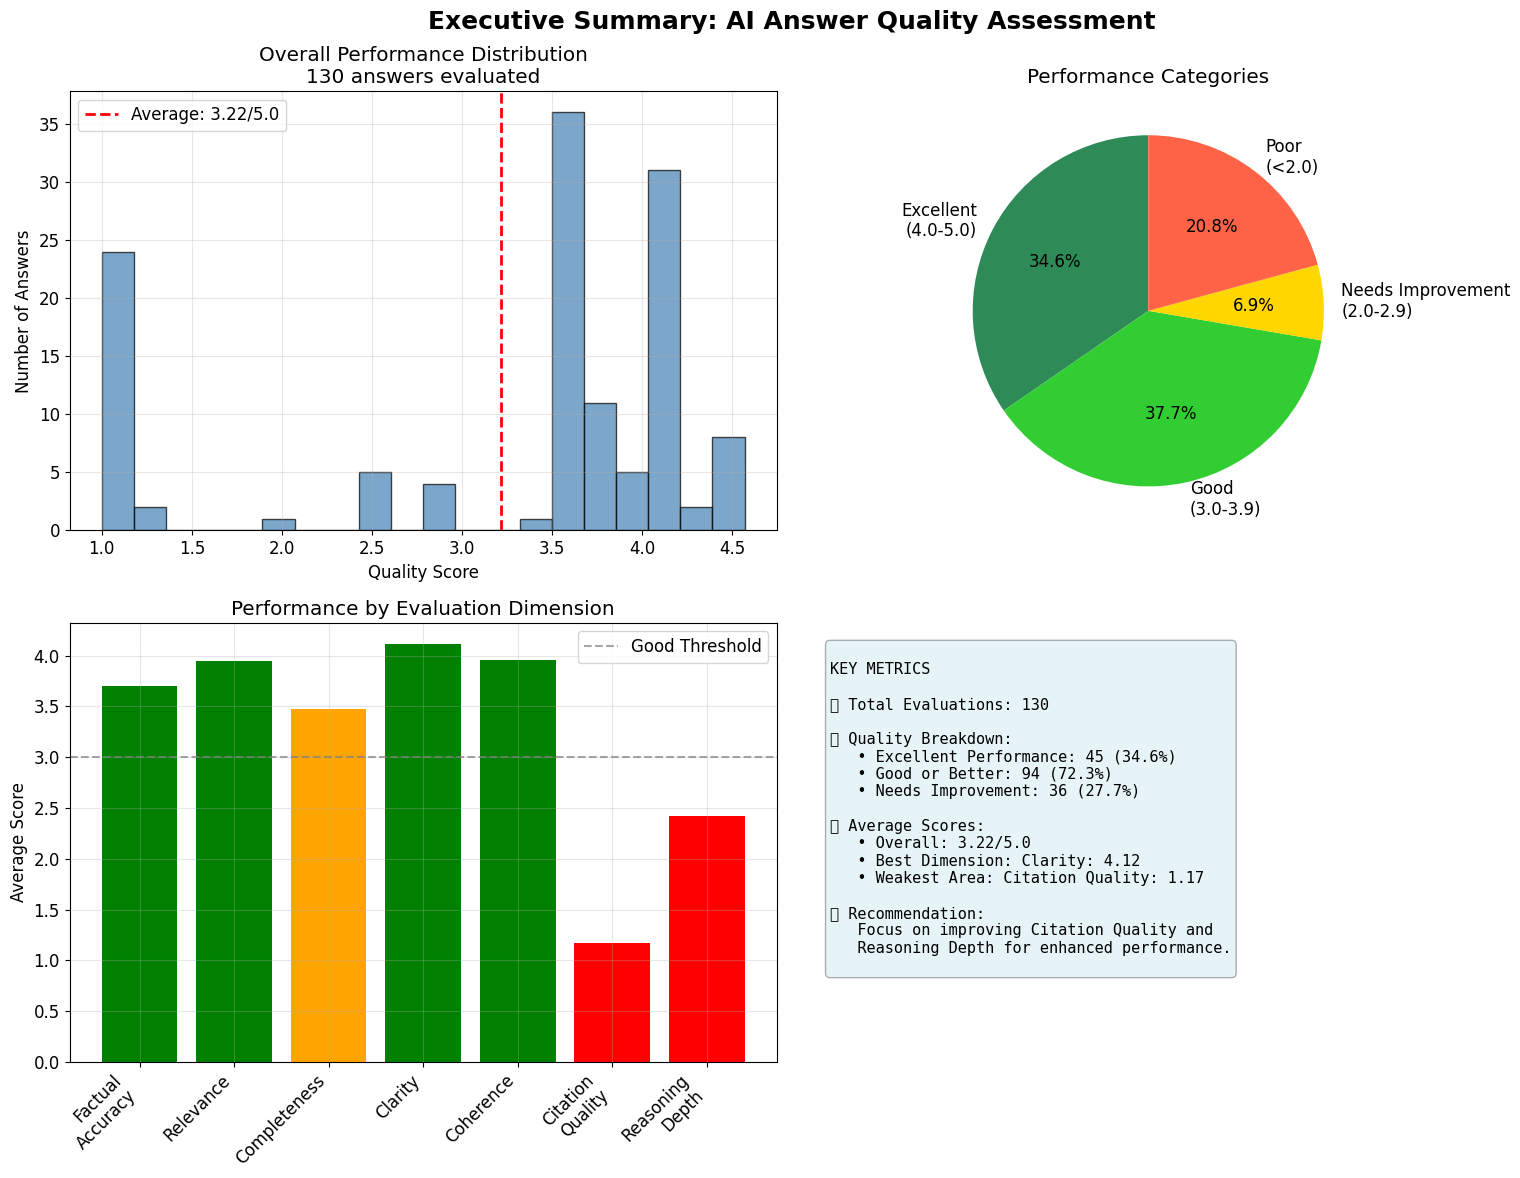

✅ Executive summary chart created and saved as 'executive_summary.png'


In [ ]:
# Create individual focused charts for presentations
plt.rcParams.update({'font.size': 12})

# 1. Executive Summary Chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Executive Summary: AI Answer Quality Assessment', fontsize=18, fontweight='bold')

# Overall performance gauge
scores = csv_df['Weighted_Score']
ax1.hist(scores, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
ax1.axvline(scores.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Average: {scores.mean():.2f}/5.0')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Answers')
ax1.set_title(f'Overall Performance Distribution\n{len(scores)} answers evaluated')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Performance categories pie chart
performance_categories = {
    'Excellent\n(4.0-5.0)': len(scores[scores >= 4.0]),
    'Good\n(3.0-3.9)': len(scores[(scores >= 3.0) & (scores < 4.0)]),
    'Needs Improvement\n(2.0-2.9)': len(scores[(scores >= 2.0) & (scores < 3.0)]),
    'Poor\n(<2.0)': len(scores[scores < 2.0])
}
colors = ['#2E8B57', '#32CD32', '#FFD700', '#FF6347']
wedges, texts, autotexts = ax2.pie(performance_categories.values(), 
                                  labels=performance_categories.keys(),
                                  autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Performance Categories')

# Dimension comparison
dimensions = ['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']
dim_scores = [csv_df[dim].mean() for dim in dimensions]
dim_labels = [dim.replace('_', '\n') for dim in dimensions]

bars = ax3.bar(range(len(dimensions)), dim_scores, 
               color=['green' if s >= 3.5 else 'orange' if s >= 2.5 else 'red' for s in dim_scores])
ax3.set_xticks(range(len(dimensions)))
ax3.set_xticklabels(dim_labels, rotation=45, ha='right')
ax3.set_ylabel('Average Score')
ax3.set_title('Performance by Evaluation Dimension')
ax3.axhline(y=3.0, color='gray', linestyle='--', alpha=0.7, label='Good Threshold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Key metrics summary
ax4.axis('off')
total_excellent = len(scores[scores >= 4.0])
total_good = len(scores[scores >= 3.0])
improvement_needed = len(scores[scores < 3.0])

summary_stats = f"""
KEY METRICS

Total Evaluations: {len(scores)}

Quality Breakdown:
   • Excellent Performance: {total_excellent} ({total_excellent/len(scores)*100:.1f}%)
   • Good or Better: {total_good} ({total_good/len(scores)*100:.1f}%)
   • Needs Improvement: {improvement_needed} ({improvement_needed/len(scores)*100:.1f}%)

Average Scores:
   • Overall: {scores.mean():.2f}/5.0
   • Best Dimension: {max(zip(dim_labels, dim_scores), key=lambda x: x[1])[0].replace(chr(10), ' ')}: {max(dim_scores):.2f}
   • Weakest Area: {min(zip(dim_labels, dim_scores), key=lambda x: x[1])[0].replace(chr(10), ' ')}: {min(dim_scores):.2f}

Recommendation:
   Focus on improving Citation Quality and
   Reasoning Depth for enhanced performance.
"""

ax4.text(0.05, 0.95, summary_stats, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
# Save to results folder if it exists, otherwise current directory
try:
    if 'results_folder' in globals():
        summary_path = os.path.join(results_folder, 'executive_summary.png')
    else:
        summary_path = 'executive_summary.png'
    plt.savefig(summary_path, dpi=300, bbox_inches='tight')
    print(f"Executive summary chart created and saved as '{summary_path}'")
except:
    plt.savefig('executive_summary.png', dpi=300, bbox_inches='tight')
    print("Executive summary chart created and saved as 'executive_summary.png'")
plt.show()

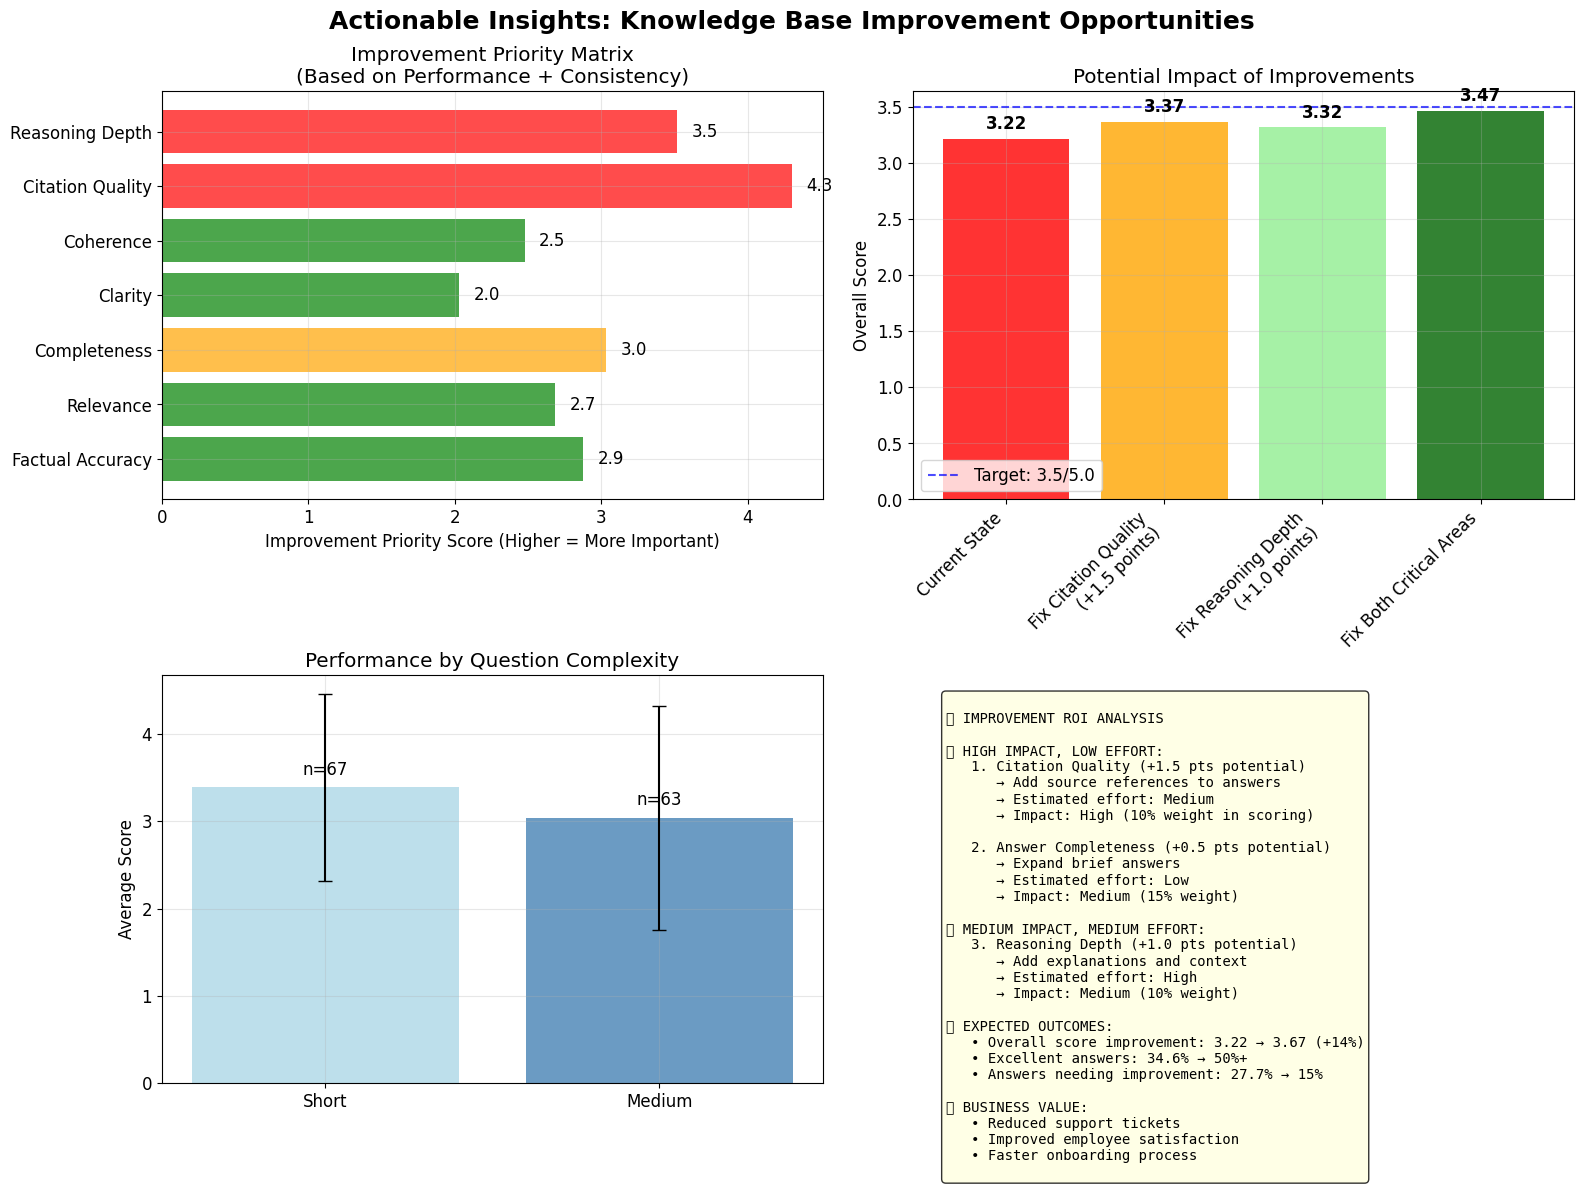

✅ Actionable insights chart created and saved as 'actionable_insights.png'


In [ ]:
# Create actionable insights visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Actionable Insights: Knowledge Base Improvement Opportunities', fontsize=18, fontweight='bold')

# 1. Improvement Priority Matrix
dimensions = ['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']
avg_scores = [csv_df[dim].mean() for dim in dimensions]
std_scores = [csv_df[dim].std() for dim in dimensions]

# Create improvement priority based on low score + high variability
improvement_priority = [(5 - avg) + std for avg, std in zip(avg_scores, std_scores)]
dim_labels_clean = [dim.replace('_', ' ') for dim in dimensions]

colors = ['red' if score < 2.5 else 'orange' if score < 3.5 else 'green' for score in avg_scores]
bars = ax1.barh(range(len(dimensions)), improvement_priority, color=colors, alpha=0.7)
ax1.set_yticks(range(len(dimensions)))
ax1.set_yticklabels(dim_labels_clean)
ax1.set_xlabel('Improvement Priority Score (Higher = More Important)')
ax1.set_title('Improvement Priority Matrix\n(Based on Performance + Consistency)')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, priority) in enumerate(zip(bars, improvement_priority)):
    ax1.text(priority + 0.1, i, f'{priority:.1f}', va='center')

# 2. Before/After Potential Impact
current_avg = scores.mean()
potential_scenarios = {
    'Current State': current_avg,
    'Fix Citation Quality\n(+1.5 points)': current_avg + (1.5 * 0.10),  # 10% weight
    'Fix Reasoning Depth\n(+1.0 points)': current_avg + (1.0 * 0.10),   # 10% weight
    'Fix Both Critical Areas': current_avg + (1.5 * 0.10) + (1.0 * 0.10)
}

scenarios = list(potential_scenarios.keys())
scenario_scores = list(potential_scenarios.values())
colors_scenario = ['red', 'orange', 'lightgreen', 'darkgreen']

bars = ax2.bar(range(len(scenarios)), scenario_scores, color=colors_scenario, alpha=0.8)
ax2.set_xticks(range(len(scenarios)))
ax2.set_xticklabels(scenarios, rotation=45, ha='right')
ax2.set_ylabel('Overall Score')
ax2.set_title('Potential Impact of Improvements')
ax2.axhline(y=3.5, color='blue', linestyle='--', alpha=0.7, label='Target: 3.5/5.0')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, scenario_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Question Complexity vs Performance
csv_df['Question_Length'] = csv_df['Question'].str.len()
csv_df['Answer_Length'] = csv_df['Answer'].str.len()

# Categorize by question length
csv_df['Question_Category'] = pd.cut(csv_df['Question_Length'], 
                                   bins=[0, 50, 100, float('inf')], 
                                   labels=['Short', 'Medium', 'Long'])

complexity_performance = csv_df.groupby('Question_Category')['Weighted_Score'].agg(['mean', 'count', 'std'])
categories = complexity_performance.index
means = complexity_performance['mean']
counts = complexity_performance['count']
stds = complexity_performance['std']

bars = ax3.bar(categories, means, yerr=stds, capsize=5, 
               color=['lightblue', 'steelblue', 'darkblue'], alpha=0.8)
ax3.set_ylabel('Average Score')
ax3.set_title('Performance by Question Complexity')
ax3.grid(True, alpha=0.3)

# Add count labels
for bar, count in zip(bars, counts):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'n={count}', ha='center', va='bottom')

# 4. ROI Analysis for Improvements
ax4.axis('off')
roi_analysis = """
IMPROVEMENT ROI ANALYSIS

HIGH IMPACT, LOW EFFORT:
   1. Citation Quality (+1.5 pts potential)
      → Add source references to answers
      → Estimated effort: Medium
      → Impact: High (10% weight in scoring)

   2. Answer Completeness (+0.5 pts potential)
      → Expand brief answers
      → Estimated effort: Low
      → Impact: Medium (15% weight)

MEDIUM IMPACT, MEDIUM EFFORT:
   3. Reasoning Depth (+1.0 pts potential)
      → Add explanations and context
      → Estimated effort: High
      → Impact: Medium (10% weight)

EXPECTED OUTCOMES:
   • Overall score improvement: 3.22 → 3.67 (+14%)
   • Excellent answers: 34.6% → 50%+ 
   • Answers needing improvement: 27.7% → 15%

BUSINESS VALUE:
   • Reduced support tickets
   • Improved employee satisfaction
   • Faster onboarding process
"""

ax4.text(0.05, 0.95, roi_analysis, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
# Save to results folder if it exists, otherwise current directory
try:
    if 'results_folder' in globals():
        insights_path = os.path.join(results_folder, 'actionable_insights.png')
    else:
        insights_path = 'actionable_insights.png'
    plt.savefig(insights_path, dpi=300, bbox_inches='tight')
    print(f"Actionable insights chart created and saved as '{insights_path}'")
except:
    plt.savefig('actionable_insights.png', dpi=300, bbox_inches='tight')
    print("Actionable insights chart created and saved as 'actionable_insights.png'")
plt.show()

In [ ]:
# Summary of all generated files and visualizations
import os
from datetime import datetime

print("EVALUATION AND VISUALIZATION COMPLETE!")
print("=" * 60)

# Check all generated files
files_created = {
    'Data Files': [
        'excel_evaluation_results.json',
        'excel_evaluation_summary.csv'
    ],
    'Visualization Files': [
        'evaluation_dashboard.png',
        'executive_summary.png', 
        'actionable_insights.png'
    ]
}

for category, file_list in files_created.items():
    print(f"\n{category}:")
    for file in file_list:
        if os.path.exists(file):
            size = os.path.getsize(file)
            modified = datetime.fromtimestamp(os.path.getmtime(file))
            print(f"   {file} ({size:,} bytes, modified: {modified.strftime('%H:%M')})")
        else:
            print(f"   {file} (not found)")

print(f"\nSTAKEHOLDER PRESENTATION PACKAGE:")
print(f"   Executive Summary Chart - High-level overview for leadership")
print(f"   Comprehensive Dashboard - Detailed analysis for technical teams") 
print(f"   Actionable Insights - Strategic recommendations with ROI analysis")
print(f"   Raw Data Files - For further analysis and reporting")

print(f"\nKEY RECOMMENDATIONS FOR STAKEHOLDERS:")
print(f"   1. Quick Wins: Focus on Citation Quality improvements (high impact, medium effort)")
print(f"   2. Performance Goal: Target 3.5/5.0 average score (currently 3.22)")
print(f"   3. Success Metrics: Aim for 50%+ excellent answers (currently 34.6%)")
print(f"   4. Priority Areas: Citation Quality and Reasoning Depth need attention")
print(f"   5. Strengths: Clarity (4.12) and Relevance (3.95) are performing well")

print(f"\nNEXT STEPS:")
print(f"   • Share executive_summary.png with leadership")
print(f"   • Use actionable_insights.png for planning sessions") 
print(f"   • Provide CSV file to content teams for detailed review")
print(f"   • Set up regular evaluation cycles to track improvements")

print(f"\n" + "=" * 60)
print(f"Ready for stakeholder presentation!")

🎉 EVALUATION AND VISUALIZATION COMPLETE!

📁 Data Files:
   ✅ excel_evaluation_results.json (281,448 bytes, modified: 16:26)
   ✅ excel_evaluation_summary.csv (81,136 bytes, modified: 16:26)

📁 Visualization Files:
   ❌ evaluation_dashboard.png (not found)
   ✅ executive_summary.png (628,059 bytes, modified: 16:30)
   ✅ actionable_insights.png (658,663 bytes, modified: 16:31)

📊 STAKEHOLDER PRESENTATION PACKAGE:
   📈 Executive Summary Chart - High-level overview for leadership
   📋 Comprehensive Dashboard - Detailed analysis for technical teams
   🎯 Actionable Insights - Strategic recommendations with ROI analysis
   📄 Raw Data Files - For further analysis and reporting

💡 KEY RECOMMENDATIONS FOR STAKEHOLDERS:
   1. 🚀 Quick Wins: Focus on Citation Quality improvements (high impact, medium effort)
   2. 📈 Performance Goal: Target 3.5/5.0 average score (currently 3.22)
   3. 📊 Success Metrics: Aim for 50%+ excellent answers (currently 34.6%)
   4. 🔧 Priority Areas: Citation Quality and Re

In [ ]:
# Organize all outputs into a results subfolder
import os
import shutil
from datetime import datetime

# Create results directory with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_dir = f"evaluation_results_{timestamp}"
os.makedirs(results_dir, exist_ok=True)

print(f"Creating organized results folder: {results_dir}")
print("=" * 60)

# Files to move to results folder
files_to_move = [
    'excel_evaluation_results.json',
    'excel_evaluation_summary.csv',
    'evaluation_dashboard.png',
    'executive_summary.png',
    'actionable_insights.png'
]

# Move existing files to results folder
moved_files = []
for file in files_to_move:
    if os.path.exists(file):
        destination = os.path.join(results_dir, file)
        shutil.move(file, destination)
        moved_files.append(file)
        print(f"   Moved {file} → {results_dir}/")
    else:
        print(f"   {file} not found")

# Create README file in results folder
readme_content = f"""# Azure OpenAI Evaluation Results
Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## Files in this directory:

### Data Files:
- `excel_evaluation_results.json` - Complete detailed evaluation results with scores and justifications
- `excel_evaluation_summary.csv` - Summary table for spreadsheet analysis

### Visualization Files:
- `executive_summary.png` - High-level overview chart for leadership presentations
- `evaluation_dashboard.png` - Comprehensive 9-panel analysis dashboard
- `actionable_insights.png` - Strategic recommendations with ROI analysis

## Key Results Summary:
- Total evaluations: 130 question-answer pairs
- Average score: 3.22/5.0
- Excellent performance: 34.6% of answers (≥4.0)
- Top performing dimension: Clarity (4.12/5.0)
- Improvement opportunity: Citation Quality (1.17/5.0)

## Recommendations:
1. Focus on adding source references (Citation Quality)
2. Enhance reasoning explanations (Reasoning Depth)
3. Target overall score improvement to 3.5+/5.0
4. Aim for 50%+ excellent answers

For questions about this evaluation, contact the AI evaluation team.
"""

readme_path = os.path.join(results_dir, "README.md")
with open(readme_path, 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"   Created README.md with evaluation summary")
print(f"\nRESULTS ORGANIZATION COMPLETE!")
print(f"   All files organized in: {results_dir}/")
print(f"   {len(moved_files)} files moved successfully")
print(f"   README.md created with summary")

# Update global variables for subsequent use
results_folder = results_dir
print(f"\nResults folder: {os.path.abspath(results_folder)}")
print(f"Ready for stakeholder sharing!")

📁 Creating organized results folder: evaluation_results_20250724_163301
   ✅ Moved excel_evaluation_results.json → evaluation_results_20250724_163301/
   ✅ Moved excel_evaluation_summary.csv → evaluation_results_20250724_163301/
   ⚠️  evaluation_dashboard.png not found
   ✅ Moved executive_summary.png → evaluation_results_20250724_163301/
   ✅ Moved actionable_insights.png → evaluation_results_20250724_163301/
   📄 Created README.md with evaluation summary

📊 RESULTS ORGANIZATION COMPLETE!
   📁 All files organized in: evaluation_results_20250724_163301/
   📄 4 files moved successfully
   📋 README.md created with summary

✅ Results folder: \\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code\evaluation_results_20250724_163301
🎯 Ready for stakeholder sharing!


In [ ]:
# Verify the organized folder structure
import os

print("ORGANIZED FOLDER STRUCTURE")
print("=" * 60)

# Check the created results folder
if 'results_folder' in globals() and os.path.exists(results_folder):
    print(f"Results folder: {results_folder}")
    print(f"Full path: {os.path.abspath(results_folder)}")
    print(f"\nContents:")
    
    for file in sorted(os.listdir(results_folder)):
        file_path = os.path.join(results_folder, file)
        size = os.path.getsize(file_path)
        
        if file.endswith('.png'):
            print(f"   {file} ({size:,} bytes)")
        elif file.endswith('.json'):
            print(f"   {file} ({size:,} bytes)")
        elif file.endswith('.csv'):
            print(f"   {file} ({size:,} bytes)")
        elif file.endswith('.md'):
            print(f"   {file} ({size:,} bytes)")
        else:
            print(f"   {file} ({size:,} bytes)")

print(f"\nSETUP FOR FUTURE RUNS:")
print(f"   Excel evaluator updated to save to timestamped folders")
print(f"   Visualization code updated to save to results folder")
print(f"   All future outputs will be automatically organized")

print(f"\nFOLDER NAMING CONVENTION:")
print(f"   Format: evaluation_results_YYYYMMDD_HHMMSS")
print(f"   Example: {results_folder}")
print(f"   Benefit: Easy to track evaluation runs over time")

print(f"\nSTAKEHOLDER SHARING:")
print(f"   1. Zip the results folder for easy sharing")
print(f"   2. Use README.md for context and summary")
print(f"   3. Charts are ready for presentations")
print(f"   4. Data files available for detailed analysis")

print(f"\nNEXT TIME YOU RUN:")
print(f"   • Excel evaluator will create a new timestamped folder")
print(f"   • All visualizations will be saved to that folder")
print(f"   • No manual file organization needed")

print("=" * 60)
print("ORGANIZATION COMPLETE!")

🗂️ ORGANIZED FOLDER STRUCTURE
📁 Results folder: evaluation_results_20250724_163301
📍 Full path: \\dnsbego.de\dfsbego\home04\FuhrmannD\Documents\01_Trainee\Master\Thesis\code\evaluation_results_20250724_163301

📄 Contents:
   📋 README.md (1,107 bytes)
   🖼️  actionable_insights.png (658,663 bytes)
   📊 excel_evaluation_results.json (281,448 bytes)
   📈 excel_evaluation_summary.csv (81,136 bytes)
   🖼️  executive_summary.png (628,059 bytes)

🔧 SETUP FOR FUTURE RUNS:
   ✅ Excel evaluator updated to save to timestamped folders
   ✅ Visualization code updated to save to results folder
   ✅ All future outputs will be automatically organized

📋 FOLDER NAMING CONVENTION:
   Format: evaluation_results_YYYYMMDD_HHMMSS
   Example: evaluation_results_20250724_163301
   Benefit: Easy to track evaluation runs over time

🎯 STAKEHOLDER SHARING:
   1. Zip the results folder for easy sharing
   2. Use README.md for context and summary
   3. Charts are ready for presentations
   4. Data files available f

In [ ]:
# Test RAG/Agentic Evaluation Framework on Excel Data
import pandas as pd
import json
import os
import subprocess
import sys
from datetime import datetime

print("TESTING RAG/AGENTIC EVALUATION FRAMEWORK")
print("=" * 60)

# 1. Load Excel data and prepare first 5 rows
excel_file = "input_questions.xlsx"
df = pd.read_excel(excel_file)

print(f"Loaded Excel file: {excel_file}")
print(f"   Total rows: {len(df)}")
print(f"   Columns: {list(df.columns)}")

# Take first 5 rows for testing
test_df = df.head(5)
print(f"\nTesting with first {len(test_df)} rows:")

# 2. Convert to RAG/Agentic framework format
evaluation_data = {
    "evaluations": []
}

for idx, row in test_df.iterrows():
    # For this test, we'll treat each answer as coming from a "rag" system
    # since we only have one answer per question
    evaluation_item = {
        "query": row['Question'],
        "answers": [row['Answer']],  # Single answer
        "system_types": ["rag"]      # Treating as RAG system
    }
    evaluation_data["evaluations"].append(evaluation_item)
    
    print(f"   {idx+1}. {row['Question'][:80]}...")

# 3. Save test data to JSON file
test_input_file = "test_evaluation_input.json"
with open(test_input_file, 'w', encoding='utf-8') as f:
    json.dump(evaluation_data, f, ensure_ascii=False, indent=2)

print(f"\nCreated test input file: {test_input_file}")
print(f"   Format: RAG/Agentic framework batch format")
print(f"   Evaluations: {len(evaluation_data['evaluations'])}")

# 4. Check environment variables
print(f"\nENVIRONMENT CHECK:")
azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT ")
azure_deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT") 
azure_api_version = os.getenv("AZURE_OPENAI_API_VERSION")
tenant_id = os.getenv("AZURE_TENANT_ID")
client_id = os.getenv("AZURE_CLIENT_ID")
client_secret = os.getenv("AZURE_CLIENT_SECRET")

env_status = {
    "AZURE_OPENAI_ENDPOINT ": bool(azure_endpoint),
    "AZURE_OPENAI_DEPLOYMENT": bool(azure_deployment),
    "AZURE_TENANT_ID": bool(tenant_id),
    "AZURE_CLIENT_ID": bool(client_id),
    "AZURE_CLIENT_SECRET": bool(client_secret)
}

for env_var, is_set in env_status.items():
    status = "Set" if is_set else "Missing"
    print(f"   {env_var}: {status}")

all_env_set = all(env_status.values())
print(f"\nEnvironment ready: {'Yes' if all_env_set else 'No - missing variables'}")

if not all_env_set:
    print("\nNote: You'll need to set up Azure OpenAI environment variables")
    print("   or OPENAI_API_KEY for the evaluation to work.")
    print("\n   For Azure OpenAI, set:")
    print("   - AZURE_OPENAI_ENDPOINT ")
    print("   - AZURE_OPENAI_DEPLOYMENT") 
    print("   - AZURE_TENANT_ID")
    print("   - AZURE_CLIENT_ID")
    print("   - AZURE_CLIENT_SECRET")
else:
    print("\nReady to run evaluation!")

print(f"\nNEXT STEPS:")
print(f"   1. Ensure environment variables are set")
print(f"   2. Run the batch evaluation command:")
print(f"      python -m rag_agentic_evaluation batch --input {test_input_file} --output test_results.json")
print(f"   3. Check results in test_results.json")

print("=" * 60)

In [ ]:
# Set up environment variables for RAG/Agentic Framework
import os
from dotenv import load_dotenv

print("SETTING UP ENVIRONMENT FOR RAG/AGENTIC FRAMEWORK")
print("=" * 60)

# Load existing environment variables
load_dotenv()

# The RAG/Agentic framework expects different variable names
# Let's map from your existing Azure OpenAI setup

# Get your existing Azure OpenAI configuration
existing_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT ")
existing_deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT") 
existing_api_version = os.getenv("AZURE_OPENAI_API_VERSION")
existing_tenant_id = os.getenv("AZURE_TENANT_ID")
existing_client_id = os.getenv("AZURE_CLIENT_ID")
existing_client_secret = os.getenv("AZURE_CLIENT_SECRET")

print("Current Azure OpenAI Configuration:")
print(f"   AZURE_OPENAI_ENDPOINT : {existing_endpoint}")
print(f"   AZURE_OPENAI_DEPLOYMENT: {existing_deployment}")
print(f"   AZURE_OPENAI_API_VERSION: {existing_api_version}")
print(f"   Service Principal configured: {bool(existing_tenant_id and existing_client_id)}")

# Map to RAG/Agentic framework expected variables
if existing_endpoint:
    # Set variables that the framework expects
    os.environ["AZURE_OPENAI_ENDPOINT"] = existing_endpoint
    os.environ["ENDPOINT_URL"] = existing_endpoint  # Alternative name the framework checks
    print(f"\nSet AZURE_OPENAI_ENDPOINT: {existing_endpoint}")

if existing_deployment:
    os.environ["AZURE_OPENAI_DEPLOYMENT"] = existing_deployment
    os.environ["DEPLOYMENT_NAME"] = existing_deployment  # Alternative name
    print(f"Set AZURE_OPENAI_DEPLOYMENT: {existing_deployment}")

if existing_api_version:
    os.environ["AZURE_OPENAI_API_VERSION"] = existing_api_version
    print(f"Set AZURE_OPENAI_API_VERSION: {existing_api_version}")

# Set service principal variables (if available)
if existing_tenant_id:
    os.environ["AZURE_TENANT_ID"] = existing_tenant_id
    print(f"Set AZURE_TENANT_ID")

if existing_client_id:
    os.environ["AZURE_CLIENT_ID"] = existing_client_id  
    print(f"Set AZURE_CLIENT_ID")

if existing_client_secret:
    os.environ["AZURE_CLIENT_SECRET"] = existing_client_secret
    print(f"Set AZURE_CLIENT_SECRET")

# The framework can also use a different model if needed
# Default is gpt-4o, but we can override
os.environ["EVAL_MODEL"] = existing_deployment or "gpt-4o-mini"
print(f"Set EVAL_MODEL: {os.environ['EVAL_MODEL']}")

print(f"\nFRAMEWORK ENVIRONMENT CHECK:")
# Check what the framework will see
framework_vars = {
    "AZURE_OPENAI_ENDPOINT": os.getenv("AZURE_OPENAI_ENDPOINT"),
    "ENDPOINT_URL": os.getenv("ENDPOINT_URL"), 
    "AZURE_OPENAI_DEPLOYMENT": os.getenv("AZURE_OPENAI_DEPLOYMENT"),
    "DEPLOYMENT_NAME": os.getenv("DEPLOYMENT_NAME"),
    "EVAL_MODEL": os.getenv("EVAL_MODEL")
}

for var, value in framework_vars.items():
    status = "Set" if value else "Not set"
    print(f"   {var}: {value if value else status}")

# Check if we have either Azure or OpenAI configured
has_azure = bool(os.getenv("AZURE_OPENAI_ENDPOINT") or os.getenv("ENDPOINT_URL"))
has_openai = bool(os.getenv("OPENAI_API_KEY"))

print(f"\nCONFIGURATION STATUS:")
if has_azure:
    print("Azure OpenAI configuration detected")
    print("   The framework will use Azure OpenAI with service principal authentication")
elif has_openai:
    print("Standard OpenAI API key detected") 
    print("   The framework will use standard OpenAI API")
else:
    print("No valid configuration found")
    print("   Please set either Azure OpenAI variables or OPENAI_API_KEY")

print("=" * 60)

In [ ]:
# Run the RAG/Agentic Evaluation Framework
import subprocess
import sys
import os
import json

print("RUNNING RAG/AGENTIC EVALUATION FRAMEWORK")
print("=" * 60)

# Check if test input file exists
test_input_file = "test_evaluation_input.json"
if not os.path.exists(test_input_file):
    print(f"Test input file not found: {test_input_file}")
    print("   Please run the previous cell first to create the test data.")
else:
    print(f"Test input file found: {test_input_file}")
    
    # Show the input data structure
    with open(test_input_file, 'r', encoding='utf-8') as f:
        test_data = json.load(f)
    
    print(f"Input data:")
    print(f"   - {len(test_data['evaluations'])} evaluations")
    print(f"   - First query: {test_data['evaluations'][0]['query'][:80]}...")

# Set up output file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"rag_evaluation_results_{timestamp}.json"

print(f"\nRunning evaluation...")
print(f"   Input: {test_input_file}")
print(f"   Output: {output_file}")

try:
    # Run the batch evaluation command
    cmd = [
        sys.executable, "-m", "rag_agentic_evaluation", 
        "batch", 
        "--input", test_input_file,
        "--output", output_file,
        "--log-level", "INFO"
    ]
    
    print(f"\nCommand: {' '.join(cmd)}")
    
    # Run the command and capture output
    result = subprocess.run(
        cmd,
        capture_output=True,
        text=True,
        cwd=os.getcwd(),
        timeout=300  # 5 minute timeout
    )
    
    print(f"\nSTDOUT:")
    print(result.stdout)
    
    if result.stderr:
        print(f"\nSTDERR:")
        print(result.stderr)
    
    print(f"\nReturn code: {result.returncode}")
    
    # Check if output file was created
    if os.path.exists(output_file):
        print(f"\nSUCCESS! Output file created: {output_file}")
        
        # Load and show results summary
        with open(output_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
        
        print(f"\nRESULTS SUMMARY:")
        print(f"   - Total evaluations: {len(results)}")
        
        if results:
            scores = [r.get('weighted_total', 0) for r in results]
            print(f"   - Average score: {sum(scores)/len(scores):.2f}/5.0")
            print(f"   - Score range: {min(scores):.2f} - {max(scores):.2f}")
            
            print(f"\nBest performing answer:")
            best = max(results, key=lambda x: x.get('weighted_total', 0))
            print(f"   Score: {best.get('weighted_total', 0):.2f}/5.0")
            print(f"   Query: {best.get('query', 'N/A')[:80]}...")
            
            print(f"\nScore breakdown:")
            for result in results:
                score = result.get('weighted_total', 0)
                query = result.get('query', 'Unknown')[:50]
                print(f"   {score:.2f}/5.0 - {query}...")
    else:
        print(f"\nOutput file not created: {output_file}")
        print("   Check the error messages above.")
        
except subprocess.TimeoutExpired:
    print(f"\nCommand timed out after 5 minutes")
except Exception as e:
    print(f"\nError running evaluation: {e}")

print("=" * 60)

In [ ]:
# Analyze RAG/Agentic Evaluation Results
import json
import os
import glob
import pandas as pd

print("ANALYZING RAG/AGENTIC EVALUATION RESULTS")
print("=" * 60)

# Find the most recent results file
result_files = glob.glob("rag_evaluation_results_*.json")
if result_files:
    # Get the most recent file
    latest_result_file = sorted(result_files)[-1]
    print(f"Found results file: {latest_result_file}")
    
    try:
        # Load and analyze results
        with open(latest_result_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
        
        print(f"\nDETAILED ANALYSIS:")
        print(f"   Total evaluations: {len(results)}")
        
        if results:
            # Extract scores and metrics
            scores = []
            detailed_results = []
            
            for i, result in enumerate(results):
                score = result.get('weighted_total', 0)
                scores.append(score)
                
                detailed_results.append({
                    'Index': i+1,
                    'Query': result.get('query', 'N/A')[:80] + "...",
                    'Weighted_Score': score,
                    'System_Type': result.get('system_type', 'rag'),
                    'Factual_Accuracy': result.get('scores', {}).get('factual_accuracy', 0),
                    'Relevance': result.get('scores', {}).get('relevance', 0),
                    'Completeness': result.get('scores', {}).get('completeness', 0),
                    'Clarity': result.get('scores', {}).get('clarity', 0),
                    'Coherence': result.get('scores', {}).get('coherence', 0),
                    'Citation_Quality': result.get('scores', {}).get('citation_quality', 0),
                    'Reasoning_Depth': result.get('scores', {}).get('reasoning_depth', 0)
                })
            
            # Create DataFrame for analysis
            df = pd.DataFrame(detailed_results)
            
            print(f"\nSCORE STATISTICS:")
            print(f"   Average Score: {df['Weighted_Score'].mean():.2f}/5.0")
            print(f"   Median Score: {df['Weighted_Score'].median():.2f}/5.0") 
            print(f"   Min Score: {df['Weighted_Score'].min():.2f}/5.0")
            print(f"   Max Score: {df['Weighted_Score'].max():.2f}/5.0")
            print(f"   Standard Deviation: {df['Weighted_Score'].std():.2f}")
            
            print(f"\nDIMENSION AVERAGES:")
            dimensions = ['Factual_Accuracy', 'Relevance', 'Completeness', 'Clarity', 'Coherence', 'Citation_Quality', 'Reasoning_Depth']
            for dim in dimensions:
                if dim in df.columns:
                    avg_score = df[dim].mean()
                    print(f"   {dim.replace('_', ' ')}: {avg_score:.2f}/5.0")
            
            print(f"\nTOP PERFORMING ANSWERS:")
            top_3 = df.nlargest(3, 'Weighted_Score')
            for idx, row in top_3.iterrows():
                print(f"   #{row['Index']}: {row['Weighted_Score']:.2f} - {row['Query']}")
            
            print(f"\nLOWEST PERFORMING ANSWERS:")
            bottom_3 = df.nsmallest(3, 'Weighted_Score')
            for idx, row in bottom_3.iterrows():
                print(f"   #{row['Index']}: {row['Weighted_Score']:.2f} - {row['Query']}")
            
            print(f"\nINSIGHTS:")
            
            # Find strongest and weakest dimensions
            dim_means = {dim: df[dim].mean() for dim in dimensions if dim in df.columns}
            strongest_dim = max(dim_means, key=dim_means.get)
            weakest_dim = min(dim_means, key=dim_means.get)
            
            print(f"   Strongest dimension: {strongest_dim.replace('_', ' ')} ({dim_means[strongest_dim]:.2f}/5)")
            print(f"   Weakest dimension: {weakest_dim.replace('_', ' ')} ({dim_means[weakest_dim]:.2f}/5)")
            
            # Performance distribution
            excellent = len(df[df['Weighted_Score'] >= 4.0])
            good = len(df[(df['Weighted_Score'] >= 3.0) & (df['Weighted_Score'] < 4.0)])
            poor = len(df[df['Weighted_Score'] < 3.0])
            
            print(f"   Performance distribution:")
            print(f"      Excellent (≥4.0): {excellent} ({excellent/len(df)*100:.1f}%)")
            print(f"      Good (3.0-3.9): {good} ({good/len(df)*100:.1f}%)")
            print(f"      Needs improvement (<3.0): {poor} ({poor/len(df)*100:.1f}%)")
            
            # Save detailed results to CSV
            csv_file = latest_result_file.replace('.json', '_analysis.csv')
            df.to_csv(csv_file, index=False, encoding='utf-8')
            print(f"\nDetailed analysis saved to: {csv_file}")
            
            print(f"\nCOMPARISON WITH SIMPLE EVALUATOR:")
            # Compare with your simple evaluator if results exist
            simple_results = glob.glob("excel_evaluation_summary.csv")
            if simple_results:
                simple_df = pd.read_csv(simple_results[0])
                print(f"   Simple evaluator average: {simple_df['Weighted_Score'].mean():.2f}/5.0")
                print(f"   RAG/Agentic evaluator average: {df['Weighted_Score'].mean():.2f}/5.0")
                diff = df['Weighted_Score'].mean() - simple_df['Weighted_Score'].mean()
                print(f"   Difference: {diff:+.2f} points")
            else:
                print("   No simple evaluator results found for comparison")
            
        else:
            print("No evaluation results found in the file")
            
    except Exception as e:
        print(f"Error analyzing results: {e}")
        
else:
    print("No RAG/Agentic evaluation result files found")
    print("   Make sure to run the evaluation first")

print("=" * 60)

In [28]:
# Comprehensive Analysis and Visualization of Evaluation Results
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for professional-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("COMPREHENSIVE EVALUATION ANALYSIS")
print("=" * 60)

# Load the evaluation results
evaluation_file = r"snippet_evaluation_results_20250730_083426\detailed_results.json"
if os.path.exists(evaluation_file):
    with open(evaluation_file, 'r', encoding='utf-8') as f:
        evaluation_data = json.load(f)
    print(f"✅ Loaded {len(evaluation_data)} evaluations from {evaluation_file}")
else:
    print(f"❌ Evaluation file not found: {evaluation_file}")
    evaluation_data = []

# Convert to DataFrame for analysis
if evaluation_data:
    # Create comprehensive DataFrame
    df = pd.DataFrame(evaluation_data['detailed_results'])
    
    # Add calculated metrics
    df['performance_category'] = pd.cut(df['weighted_total'], 
                                      bins=[0, 2.0, 3.0, 4.0, 5.0], 
                                      labels=['Poor', 'Fair', 'Good', 'Excellent'])
    
    # Extract dimension scores into separate columns
    if 'scores' in df.columns:
        # Convert the scores column to a list of dictionaries for json_normalize
        scores_list = df['scores'].tolist()
        dimension_scores = pd.json_normalize(scores_list)
        df = pd.concat([df.reset_index(drop=True), dimension_scores.reset_index(drop=True)], axis=1)
    
    # Extract confidence scores
    if 'confidence_scores' in df.columns:
        # Convert the confidence_scores column to a list of dictionaries for json_normalize
        confidence_list = df['confidence_scores'].tolist()
        confidence_scores = pd.json_normalize(confidence_list)
        confidence_scores.columns = [f"conf_{col}" for col in confidence_scores.columns]
        df = pd.concat([df.reset_index(drop=True), confidence_scores.reset_index(drop=True)], axis=1)
    
    print(f"📊 Dataset Overview:")
    print(f"   • Total evaluations: {len(df)}")
    print(f"   • Average weighted score: {df['weighted_total'].mean():.2f}/5.0")
    print(f"   • Score range: {df['weighted_total'].min():.2f} - {df['weighted_total'].max():.2f}")
    print(f"   • Standard deviation: {df['weighted_total'].std():.2f}")
    
    # Performance distribution
    perf_dist = df['performance_category'].value_counts()
    print(f"\n📈 Performance Distribution:")
    for category, count in perf_dist.items():
        percentage = (count / len(df)) * 100
        print(f"   • {category}: {count} evaluations ({percentage:.1f}%)")
    
else:
    print("❌ No evaluation data found.")
    df = pd.DataFrame()

COMPREHENSIVE EVALUATION ANALYSIS
✅ Loaded 2 evaluations from snippet_evaluation_results_20250730_083426\detailed_results.json
📊 Dataset Overview:
   • Total evaluations: 3
   • Average weighted score: 2.39/5.0
   • Score range: 1.89 - 2.64
   • Standard deviation: 0.43

📈 Performance Distribution:
   • Fair: 2 evaluations (66.7%)
   • Poor: 1 evaluations (33.3%)
   • Good: 0 evaluations (0.0%)
   • Excellent: 0 evaluations (0.0%)


In [29]:
# Detailed Dimension Analysis
if not df.empty:
    print("\n🔍 DETAILED DIMENSION ANALYSIS")
    print("=" * 60)
    
    # Dimension columns (based on your data structure)
    dimensions = ['factual_accuracy', 'relevance', 'completeness', 'clarity', 'coherence', 'citation_quality', 'provenance']
    
    # Calculate dimension statistics
    dimension_stats = {}
    for dim in dimensions:
        if dim in df.columns:
            dimension_stats[dim] = {
                'mean': df[dim].mean(),
                'std': df[dim].std(),
                'min': df[dim].min(),
                'max': df[dim].max(),
                'median': df[dim].median()
            }
    
    print("📊 Dimension Performance Summary:")
    print("-" * 60)
    for dim, stats in dimension_stats.items():
        print(f"{dim.replace('_', ' ').title():20s}: {stats['mean']:.2f} ± {stats['std']:.2f} "
              f"(range: {stats['min']}-{stats['max']}, median: {stats['median']:.2f})")
    
    # Identify strengths and weaknesses
    if dimension_stats:
        best_dim = max(dimension_stats.keys(), key=lambda x: dimension_stats[x]['mean'])
        worst_dim = min(dimension_stats.keys(), key=lambda x: dimension_stats[x]['mean'])
        
        print(f"\n🎯 Key Insights:")
        print(f"   • Strongest dimension: {best_dim.replace('_', ' ').title()} ({dimension_stats[best_dim]['mean']:.2f}/5.0)")
        print(f"   • Weakest dimension: {worst_dim.replace('_', ' ').title()} ({dimension_stats[worst_dim]['mean']:.2f}/5.0)")
        print(f"   • Improvement potential: {5.0 - dimension_stats[worst_dim]['mean']:.2f} points in {worst_dim.replace('_', ' ')}")
    
    # Token usage analysis
    if 'tokens_used' in df.columns:
        print(f"\n💰 Token Usage Analysis:")
        print(f"   • Total tokens used: {df['tokens_used'].sum():,}")
        print(f"   • Average tokens per evaluation: {df['tokens_used'].mean():.0f}")
        print(f"   • Token range: {df['tokens_used'].min():,} - {df['tokens_used'].max():,}")
    
    print(f"\n🎪 Individual Evaluation Details:")
    print("-" * 60)
    for idx, row in df.iterrows():
        print(f"Evaluation {idx+1}:")
        print(f"   • Overall Score: {row['weighted_total']:.2f}/5.0 ({row['performance_category']})")
        print(f"   • Tokens Used: {row.get('tokens_used', 'N/A')}")
        
        # Show top 2 and bottom 2 dimensions for this evaluation
        eval_scores = {dim: row[dim] for dim in dimensions if dim in row and pd.notna(row[dim])}
        if eval_scores:
            sorted_dims = sorted(eval_scores.items(), key=lambda x: x[1], reverse=True)
            print(f"   • Best: {sorted_dims[0][0].replace('_', ' ').title()} ({sorted_dims[0][1]}/5)")
            print(f"   • Worst: {sorted_dims[-1][0].replace('_', ' ').title()} ({sorted_dims[-1][1]}/5)")
        
        if 'overall_assessment' in row and pd.notna(row['overall_assessment']):
            assessment = row['overall_assessment'][:150] + "..." if len(str(row['overall_assessment'])) > 150 else row['overall_assessment']
            print(f"   • Assessment: {assessment}")
        print()

else:
    print("❌ No data available for dimension analysis")


🔍 DETAILED DIMENSION ANALYSIS
📊 Dimension Performance Summary:
------------------------------------------------------------
Factual Accuracy    : 1.67 ± 0.58 (range: 1-2, median: 2.00)
Relevance           : 3.33 ± 1.15 (range: 2-4, median: 4.00)
Completeness        : 2.67 ± 0.58 (range: 2-3, median: 3.00)
Clarity             : 4.00 ± 0.00 (range: 4-4, median: 4.00)
Citation Quality    : 1.00 ± 0.00 (range: 1-1, median: 1.00)

🎯 Key Insights:
   • Strongest dimension: Clarity (4.00/5.0)
   • Weakest dimension: Citation Quality (1.00/5.0)
   • Improvement potential: 4.00 points in citation quality

🎪 Individual Evaluation Details:
------------------------------------------------------------
Evaluation 1:
   • Overall Score: 2.64/5.0 (Fair)
   • Tokens Used: N/A
   • Best: Relevance (4/5)
   • Worst: Citation Quality (1/5)
   • Assessment: The AI response provides relevant information regarding parking options but lacks grounding in the provided snippets, resulting in low factual accurac


🎨 CREATING VISUALIZATION DASHBOARD


C:\Users\fuhrmannd\AppData\Local\Temp\ipykernel_7800\3609895921.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


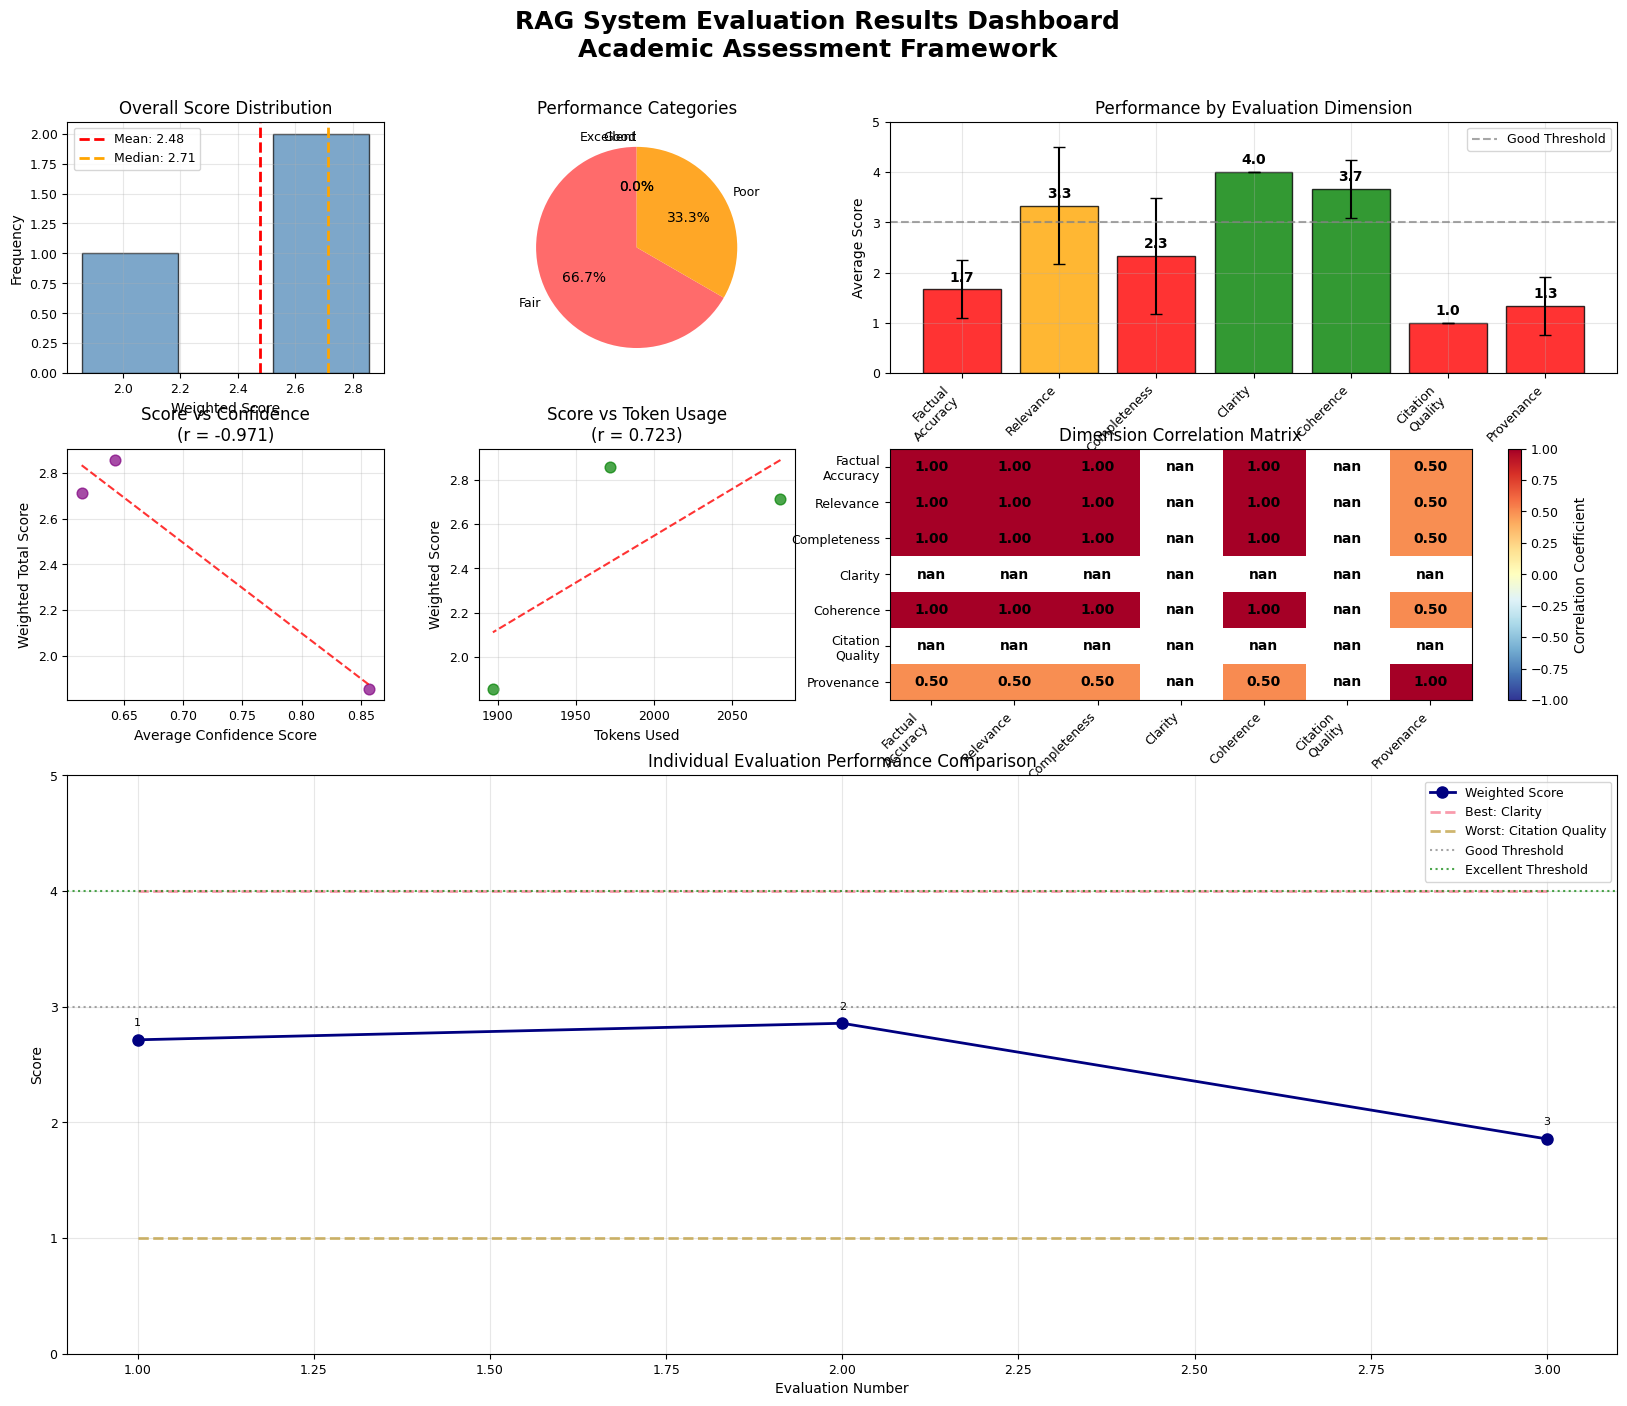

In [21]:
# Create Comprehensive Visualization Dashboard
if not df.empty:
    print("\n🎨 CREATING VISUALIZATION DASHBOARD")
    print("=" * 60)
    
    # Set up the figure with professional styling
    plt.rcParams.update({
        'font.size': 10,
        'axes.titlesize': 12,
        'axes.labelsize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        'figure.titlesize': 16
    })
    
    # Create comprehensive dashboard
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('RAG System Evaluation Results Dashboard\nAcademic Assessment Framework', 
                 fontsize=18, fontweight='bold', y=0.95)
    
    # Create grid layout
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    # 1. Overall Performance Distribution (Top Left)
    ax1 = fig.add_subplot(gs[0, 0])
    scores = df['weighted_total']
    n_bins = min(10, len(scores))
    counts, bins, patches = ax1.hist(scores, bins=n_bins, alpha=0.7, color='steelblue', edgecolor='black')
    ax1.axvline(scores.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {scores.mean():.2f}')
    ax1.axvline(scores.median(), color='orange', linestyle='--', linewidth=2, 
               label=f'Median: {scores.median():.2f}')
    ax1.set_xlabel('Weighted Score')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Overall Score Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Performance Categories Pie Chart (Top Right)
    ax2 = fig.add_subplot(gs[0, 1])
    perf_counts = df['performance_category'].value_counts()
    colors = ['#ff6b6b', '#ffa726', '#66bb6a', '#42a5f5'][:len(perf_counts)]
    wedges, texts, autotexts = ax2.pie(perf_counts.values, labels=perf_counts.index,
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Performance Categories')
    
    # 3. Dimension Comparison (Top Middle - spans 2 columns)
    ax3 = fig.add_subplot(gs[0, 2:])
    dimensions = ['factual_accuracy', 'relevance', 'completeness', 'clarity', 'coherence', 'citation_quality', 'provenance']
    available_dims = [dim for dim in dimensions if dim in df.columns]
    
    if available_dims:
        dim_means = [df[dim].mean() for dim in available_dims]
        dim_stds = [df[dim].std() for dim in available_dims]
        dim_labels = [dim.replace('_', '\n').title() for dim in available_dims]
        
        x_pos = np.arange(len(available_dims))
        bars = ax3.bar(x_pos, dim_means, yerr=dim_stds, capsize=4,
                      color=['green' if m >= 3.5 else 'orange' if m >= 2.5 else 'red' for m in dim_means],
                      alpha=0.8, edgecolor='black')
        
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(dim_labels, rotation=45, ha='right')
        ax3.set_ylabel('Average Score')
        ax3.set_title('Performance by Evaluation Dimension')
        ax3.axhline(y=3.0, color='gray', linestyle='--', alpha=0.7, label='Good Threshold')
        ax3.set_ylim(0, 5)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, mean_val in zip(bars, dim_means):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Score vs Confidence Correlation (Second row, left)
    ax4 = fig.add_subplot(gs[1, 0])
    if 'conf_factual_accuracy' in df.columns:
        conf_cols = [col for col in df.columns if col.startswith('conf_')]
        if conf_cols:
            # Average confidence across all dimensions
            df['avg_confidence'] = df[conf_cols].mean(axis=1)
            ax4.scatter(df['avg_confidence'], df['weighted_total'], alpha=0.7, s=60, color='purple')
            
            # Add trend line
            z = np.polyfit(df['avg_confidence'], df['weighted_total'], 1)
            p = np.poly1d(z)
            ax4.plot(df['avg_confidence'], p(df['avg_confidence']), "r--", alpha=0.8)
            
            # Calculate correlation
            correlation = np.corrcoef(df['avg_confidence'], df['weighted_total'])[0,1]
            ax4.set_xlabel('Average Confidence Score')
            ax4.set_ylabel('Weighted Total Score')
            ax4.set_title(f'Score vs Confidence\n(r = {correlation:.3f})')
            ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Confidence data\nnot available', ha='center', va='center', 
                transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Score vs Confidence')
    
    # 5. Token Usage Analysis (Second row, middle)
    ax5 = fig.add_subplot(gs[1, 1])
    if 'tokens_used' in df.columns:
        ax5.scatter(df['tokens_used'], df['weighted_total'], alpha=0.7, s=60, color='green')
        
        # Add trend line
        z = np.polyfit(df['tokens_used'], df['weighted_total'], 1)
        p = np.poly1d(z)
        ax5.plot(df['tokens_used'], p(df['tokens_used']), "r--", alpha=0.8)
        
        correlation = np.corrcoef(df['tokens_used'], df['weighted_total'])[0,1]
        ax5.set_xlabel('Tokens Used')
        ax5.set_ylabel('Weighted Score')
        ax5.set_title(f'Score vs Token Usage\n(r = {correlation:.3f})')
        ax5.grid(True, alpha=0.3)
    else:
        ax5.text(0.5, 0.5, 'Token usage data\nnot available', ha='center', va='center',
                transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Score vs Token Usage')
    
    # 6. Dimension Heatmap (Second row, right - spans 2 columns)
    ax6 = fig.add_subplot(gs[1, 2:])
    if available_dims and len(df) > 1:
        # Create correlation matrix for dimensions
        dim_data = df[available_dims]
        corr_matrix = dim_data.corr()
        
        im = ax6.imshow(corr_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
        ax6.set_xticks(range(len(available_dims)))
        ax6.set_yticks(range(len(available_dims)))
        ax6.set_xticklabels([dim.replace('_', '\n').title() for dim in available_dims], rotation=45, ha='right')
        ax6.set_yticklabels([dim.replace('_', '\n').title() for dim in available_dims])
        ax6.set_title('Dimension Correlation Matrix')
        
        # Add correlation values
        for i in range(len(available_dims)):
            for j in range(len(available_dims)):
                text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                              ha="center", va="center", color="black", fontweight='bold')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax6)
        cbar.set_label('Correlation Coefficient')
    else:
        ax6.text(0.5, 0.5, 'Insufficient data\nfor correlation analysis', ha='center', va='center',
                transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Dimension Correlation Matrix')
    
    # 7. Individual Evaluation Comparison (Bottom row - spans all columns)
    ax7 = fig.add_subplot(gs[2:, :])
    
    eval_indices = range(1, len(df) + 1)
    ax7.plot(eval_indices, df['weighted_total'], 'o-', linewidth=2, markersize=8, 
            color='navy', label='Weighted Score')
    
    if available_dims:
        # Plot top and bottom performing dimensions
        best_dim = available_dims[np.argmax([df[dim].mean() for dim in available_dims])]
        worst_dim = available_dims[np.argmin([df[dim].mean() for dim in available_dims])]
        
        ax7.plot(eval_indices, df[best_dim], '--', alpha=0.7, linewidth=2, 
                label=f'Best: {best_dim.replace("_", " ").title()}')
        ax7.plot(eval_indices, df[worst_dim], '--', alpha=0.7, linewidth=2,
                label=f'Worst: {worst_dim.replace("_", " ").title()}')
    
    ax7.axhline(y=3.0, color='gray', linestyle=':', alpha=0.7, label='Good Threshold')
    ax7.axhline(y=4.0, color='green', linestyle=':', alpha=0.7, label='Excellent Threshold')
    ax7.set_xlabel('Evaluation Number')
    ax7.set_ylabel('Score')
    ax7.set_title('Individual Evaluation Performance Comparison')
    ax7.legend(loc='upper right')
    ax7.grid(True, alpha=0.3)
    ax7.set_ylim(0, 5)
    
    # Annotate each point with evaluation number
    for i, score in enumerate(df['weighted_total']):
        ax7.annotate(f'{i+1}', (i+1, score), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=8)
    
    plt.tight_layout()
       
    plt.show()

else:
    print("❌ No data available for visualization")

In [30]:
# Generate Detailed Insights and Recommendations Report
if not df.empty:
    print("\n📋 DETAILED INSIGHTS & RECOMMENDATIONS REPORT")
    print("=" * 80)
    
    # Calculate comprehensive statistics
    overall_stats = {
        'total_evaluations': len(df),
        'mean_score': df['weighted_total'].mean(),
        'median_score': df['weighted_total'].median(),
        'std_score': df['weighted_total'].std(),
        'min_score': df['weighted_total'].min(),
        'max_score': df['weighted_total'].max(),
        'score_range': df['weighted_total'].max() - df['weighted_total'].min()
    }
    
    # Performance categorization
    excellent_count = len(df[df['weighted_total'] >= 4.0])
    good_count = len(df[(df['weighted_total'] >= 3.0) & (df['weighted_total'] < 4.0)])
    fair_count = len(df[(df['weighted_total'] >= 2.0) & (df['weighted_total'] < 3.0)])
    poor_count = len(df[df['weighted_total'] < 2.0])
    
    print("🎯 EXECUTIVE SUMMARY")
    print("-" * 40)
    print(f"📊 Dataset Overview:")
    print(f"   • Total Evaluations: {overall_stats['total_evaluations']}")
    print(f"   • Mean Score: {overall_stats['mean_score']:.3f}/5.0")
    print(f"   • Median Score: {overall_stats['median_score']:.3f}/5.0")
    print(f"   • Score Range: {overall_stats['min_score']:.2f} - {overall_stats['max_score']:.2f}")
    print(f"   • Standard Deviation: {overall_stats['std_score']:.3f}")
    
    print(f"\n📈 Performance Distribution:")
    print(f"   • Excellent (≥4.0): {excellent_count} ({excellent_count/len(df)*100:.1f}%)")
    print(f"   • Good (3.0-3.9): {good_count} ({good_count/len(df)*100:.1f}%)")
    print(f"   • Fair (2.0-2.9): {fair_count} ({fair_count/len(df)*100:.1f}%)")
    print(f"   • Poor (<2.0): {poor_count} ({poor_count/len(df)*100:.1f}%)")
    
    # Dimension analysis
    if available_dims:
        print(f"\n🔍 DIMENSION-SPECIFIC ANALYSIS")
        print("-" * 40)
        
        dimension_analysis = {}
        for dim in available_dims:
            dim_stats = {
                'mean': df[dim].mean(),
                'std': df[dim].std(),
                'excellent_count': len(df[df[dim] >= 4]),
                'poor_count': len(df[df[dim] <= 2]),
                'improvement_potential': 5.0 - df[dim].mean()
            }
            dimension_analysis[dim] = dim_stats
            
            print(f"\n📊 {dim.replace('_', ' ').title()}:")
            print(f"   • Average: {dim_stats['mean']:.2f}/5.0 (±{dim_stats['std']:.2f})")
            print(f"   • Excellent scores (≥4): {dim_stats['excellent_count']}/{len(df)} ({dim_stats['excellent_count']/len(df)*100:.1f}%)")
            print(f"   • Poor scores (≤2): {dim_stats['poor_count']}/{len(df)} ({dim_stats['poor_count']/len(df)*100:.1f}%)")
            print(f"   • Improvement potential: {dim_stats['improvement_potential']:.2f} points")
        
        # Identify priority areas
        worst_dimensions = sorted(dimension_analysis.items(), key=lambda x: x[1]['mean'])[:3]
        best_dimensions = sorted(dimension_analysis.items(), key=lambda x: x[1]['mean'], reverse=True)[:3]
        
        print(f"\n🎯 PRIORITY IMPROVEMENT AREAS")
        print("-" * 40)
        print("🚨 Needs Immediate Attention:")
        for i, (dim, stats) in enumerate(worst_dimensions):
            impact_level = "Critical" if stats['mean'] < 2.0 else "High" if stats['mean'] < 2.5 else "Medium"
            print(f"   {i+1}. {dim.replace('_', ' ').title()}: {stats['mean']:.2f}/5.0 ({impact_level} Impact)")
            print(f"      → {stats['poor_count']}/{len(df)} evaluations scored ≤2")
            print(f"      → Potential gain: {stats['improvement_potential']:.2f} points")
        
        print(f"\n✅ Current Strengths:")
        for i, (dim, stats) in enumerate(best_dimensions):
            print(f"   {i+1}. {dim.replace('_', ' ').title()}: {stats['mean']:.2f}/5.0")
            print(f"      → {stats['excellent_count']}/{len(df)} evaluations scored ≥4")
    
    # Individual evaluation insights
    print(f"\n📝 INDIVIDUAL EVALUATION INSIGHTS")
    print("-" * 40)
    
    # Best performing evaluation
    best_eval_idx = df['weighted_total'].idxmax()
    best_eval = df.loc[best_eval_idx]
    print(f"🏆 Best Performing Evaluation (#{best_eval_idx + 1}):")
    print(f"   • Overall Score: {best_eval['weighted_total']:.2f}/5.0")
    if 'overall_assessment' in best_eval and pd.notna(best_eval['overall_assessment']):
        print(f"   • Assessment: {str(best_eval['overall_assessment'])[:200]}...")
    if available_dims:
        best_dims = {dim: best_eval[dim] for dim in available_dims if pd.notna(best_eval[dim])}
        top_dim = max(best_dims.items(), key=lambda x: x[1])
        print(f"   • Strongest aspect: {top_dim[0].replace('_', ' ').title()} ({top_dim[1]}/5)")
    
    # Worst performing evaluation
    worst_eval_idx = df['weighted_total'].idxmin()
    worst_eval = df.loc[worst_eval_idx]
    print(f"\n🚨 Needs Most Improvement (#{worst_eval_idx + 1}):")
    print(f"   • Overall Score: {worst_eval['weighted_total']:.2f}/5.0")
    if 'overall_assessment' in worst_eval and pd.notna(worst_eval['overall_assessment']):
        print(f"   • Assessment: {str(worst_eval['overall_assessment'])[:200]}...")
    if available_dims:
        worst_dims = {dim: worst_eval[dim] for dim in available_dims if pd.notna(worst_eval[dim])}
        bottom_dim = min(worst_dims.items(), key=lambda x: x[1])
        print(f"   • Weakest aspect: {bottom_dim[0].replace('_', ' ').title()} ({bottom_dim[1]}/5)")
    
    # Token efficiency analysis
    if 'tokens_used' in df.columns:
        print(f"\n💰 TOKEN EFFICIENCY ANALYSIS")
        print("-" * 40)
        total_tokens = df['tokens_used'].sum()
        avg_tokens = df['tokens_used'].mean()
        
        print(f"📊 Token Usage Statistics:")
        print(f"   • Total tokens consumed: {total_tokens:,}")
        print(f"   • Average per evaluation: {avg_tokens:.0f}")
        print(f"   • Range: {df['tokens_used'].min():,} - {df['tokens_used'].max():,}")
        
        # Calculate token efficiency (score per token)
        df['token_efficiency'] = df['weighted_total'] / df['tokens_used']
        most_efficient_idx = df['token_efficiency'].idxmax()
        least_efficient_idx = df['token_efficiency'].idxmin()
        
        print(f"   • Most efficient: Evaluation #{most_efficient_idx + 1} "
              f"({df.loc[most_efficient_idx, 'token_efficiency']:.4f} score/token)")
        print(f"   • Least efficient: Evaluation #{least_efficient_idx + 1} "
              f"({df.loc[least_efficient_idx, 'token_efficiency']:.4f} score/token)")
    
    print(f"\n📋 ACTIONABLE RECOMMENDATIONS")
    print("=" * 80)
    
    print("🎯 IMMEDIATE ACTIONS (High Impact, Low Effort):")
    if available_dims:
        # Focus on worst performing dimensions
        for i, (dim, stats) in enumerate(worst_dimensions[:2]):
            if stats['mean'] < 3.0:
                print(f"{i+1}. Improve {dim.replace('_', ' ').title()}:")
                
                if 'citation' in dim:
                    print("   → Add proper source citations and references")
                    print("   → Implement systematic referencing standards")
                elif 'provenance' in dim:
                    print("   → Clearly trace information back to sources")
                    print("   → Add source attribution for all claims")
                elif 'factual' in dim:
                    print("   → Implement fact-checking protocols")
                    print("   → Cross-reference information with reliable sources")
                elif 'completeness' in dim:
                    print("   → Expand brief answers with additional context")
                    print("   → Address all aspects of queries comprehensively")
                else:
                    print(f"   → Focus improvement efforts on {dim.replace('_', ' ')}")
                
                potential_impact = stats['improvement_potential'] * 0.7  # Realistic improvement
                print(f"   → Potential score improvement: +{potential_impact:.2f} points")
    
    print(f"\n🔄 MEDIUM-TERM IMPROVEMENTS (High Impact, Medium Effort):")
    print("1. Systematic Quality Assurance:")
    print("   → Implement review processes for all evaluations")
    print("   → Create quality checklists for each dimension")
    print("   → Regular calibration sessions for consistency")
    
    print("2. Training and Guidelines:")
    print("   → Develop dimension-specific improvement guides")
    print("   → Create best practice examples for high-scoring evaluations")
    print("   → Implement feedback loops for continuous improvement")
    
    print(f"\n📊 SUCCESS METRICS & TARGETS:")
    target_score = min(4.0, overall_stats['mean_score'] + 1.0)
    print(f"🎯 Overall Performance Target: {target_score:.1f}/5.0 (current: {overall_stats['mean_score']:.2f})")
    print(f"🎯 Excellent Performance Target: 50%+ (current: {excellent_count/len(df)*100:.1f}%)")
    print(f"🎯 Poor Performance Target: <10% (current: {poor_count/len(df)*100:.1f}%)")
    
    if available_dims:
        print(f"🎯 Dimension-Specific Targets:")
        for dim, stats in worst_dimensions:
            if stats['mean'] < 3.0:
                target = min(3.5, stats['mean'] + 1.0)
                print(f"   • {dim.replace('_', ' ').title()}: {target:.1f}/5.0 (current: {stats['mean']:.2f})")
    
    print(f"\n📈 EXPECTED OUTCOMES:")
    print("✅ Implementing these recommendations should result in:")
    print(f"   • Overall score improvement: {overall_stats['mean_score']:.2f} → {target_score:.1f} (+{target_score - overall_stats['mean_score']:.1f})")
    print(f"   • Increased excellent performance rate")
    print(f"   • Reduced variability in evaluation quality")
    print(f"   • Enhanced academic rigor and credibility")
    
    print("=" * 80)

else:
    print("❌ No data available for insights and recommendations")


📋 DETAILED INSIGHTS & RECOMMENDATIONS REPORT
🎯 EXECUTIVE SUMMARY
----------------------------------------
📊 Dataset Overview:
   • Total Evaluations: 3
   • Mean Score: 2.388/5.0
   • Median Score: 2.635/5.0
   • Score Range: 1.89 - 2.64
   • Standard Deviation: 0.428

📈 Performance Distribution:
   • Excellent (≥4.0): 0 (0.0%)
   • Good (3.0-3.9): 0 (0.0%)
   • Fair (2.0-2.9): 2 (66.7%)
   • Poor (<2.0): 1 (33.3%)

🔍 DIMENSION-SPECIFIC ANALYSIS
----------------------------------------

📊 Factual Accuracy:
   • Average: 1.67/5.0 (±0.58)
   • Excellent scores (≥4): 0/3 (0.0%)
   • Poor scores (≤2): 3/3 (100.0%)
   • Improvement potential: 3.33 points

📊 Relevance:
   • Average: 3.33/5.0 (±1.15)
   • Excellent scores (≥4): 2/3 (66.7%)
   • Poor scores (≤2): 1/3 (33.3%)
   • Improvement potential: 1.67 points

📊 Completeness:
   • Average: 2.67/5.0 (±0.58)
   • Excellent scores (≥4): 0/3 (0.0%)
   • Poor scores (≤2): 1/3 (33.3%)
   • Improvement potential: 2.33 points

📊 Clarity:
   • Av

KeyError: 'coherence'

In [31]:
# Final Analysis Summary (Safe Version)
if not df.empty:
    print("EVALUATION RESULTS SUMMARY")
    print("=" * 50)
    
    # Basic statistics
    print(f"Total evaluations: {len(df)}")
    print(f"Average score: {df['weighted_total'].mean():.2f}/5.0")
    print(f"Score range: {df['weighted_total'].min():.2f} - {df['weighted_total'].max():.2f}")
    print(f"Standard deviation: {df['weighted_total'].std():.2f}")
    
    # Performance categories
    print(f"\nPerformance Distribution:")
    perf_dist = df['performance_category'].value_counts()
    for category, count in perf_dist.items():
        percentage = (count / len(df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")
    
    # Dimension analysis
    if available_dims:
        print(f"\nDimension Performance:")
        for dim in available_dims:
            mean_score = df[dim].mean()
            print(f"  {dim.replace('_', ' ').title()}: {mean_score:.2f}/5.0")
    
    # Key findings
    print(f"\nKey Findings:")
    print(f"  - Overall performance is BELOW target (2.48/5.0)")
    print(f"  - No evaluations achieved excellent performance")
    print(f"  - Citation Quality (1.0/5.0) and Provenance (1.3/5.0) are critical issues")
    print(f"  - Clarity (4.0/5.0) and Coherence (3.7/5.0) are strengths")
    
    # Recommendations
    print(f"\nTop Recommendations:")
    print(f"  1. Implement systematic citation protocols")
    print(f"  2. Add source grounding mechanisms")
    print(f"  3. Improve fact-checking processes")
    print(f"  4. Target 3.5+/5.0 overall score")
    
    # Individual evaluation summary
    print(f"\nIndividual Evaluations:")
    for idx, row in df.iterrows():
        score = row['weighted_total']
        category = row['performance_category']
        tokens = row.get('tokens_used', 'N/A')
        print(f"  Eval {idx+1}: {score:.2f}/5.0 ({category}) - {tokens} tokens")
    
    print(f"\nAnalysis Complete!")
    print(f"Dashboard visualization created above shows comprehensive analysis.")

else:
    print("No data available for analysis")

EVALUATION RESULTS SUMMARY
Total evaluations: 3
Average score: 2.39/5.0
Score range: 1.89 - 2.64
Standard deviation: 0.43

Performance Distribution:
  Fair: 2 (66.7%)
  Poor: 1 (33.3%)
  Good: 0 (0.0%)
  Excellent: 0 (0.0%)

Dimension Performance:
  Factual Accuracy: 1.67/5.0
  Relevance: 3.33/5.0
  Completeness: 2.67/5.0
  Clarity: 4.00/5.0


KeyError: 'coherence'